In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import shutil

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.metrics import Recall, Precision

In [2]:
train_dataGen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_dataGen = ImageDataGenerator(rescale=1./255)

In [3]:
dataset_path= 'C:/Users/Lenovo/Desktop/Guvi DS/Project/Disease Classification/Data/color'

In [4]:
file_paths = []
labels = []


# Function to check if a file is an image
def is_image_file(file_path):
    try:
        img = Image.open(file_path)
        img.verify()
        return True
    except :
        return False

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        #print(f'Processing directory: {root}')
        file_path = os.path.join(root, file)
        if is_image_file(file_path) :
            file_paths.append(file_path)
            labels.append(os.path.basename(root))  
            #print(os.path.basename(root))

print(f'Found {len(file_paths)} images')

print(f'Unique labels : {set(labels)}')

filePath_series = pd.Series(file_paths, name='Filepaths')
label_series = pd.Series(labels, name='Labels')

df = pd.concat([filePath_series, label_series], axis=1)

train_files, test_files, train_labels, test_labels = train_test_split(file_paths, labels , test_size=0.2, random_state=42)

print(f'Train set size: {len(train_files)}')
print(f'Test set size: {len(test_files)}')




Found 54305 images
Unique labels : {'Tomato___Septoria_leaf_spot', 'Soybean___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Strawberry___Leaf_scorch', 'Potato___healthy', 'Tomato___Target_Spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Pepper,_bell___healthy', 'Peach___healthy', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Potato___Late_blight', 'Apple___Apple_scab', 'Tomato___healthy', 'Apple___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Blueberry___healthy', 'Tomato___Early_blight', 'Cherry_(including_sour)___healthy', 'Apple___Black_rot', 'Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Squash___Powdery_mildew', 'Apple___Cedar_apple_rust', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Leaf_Mold', 'Corn_(maize)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Grape___healthy', 'Tomato___Bacterial_spot', 'Raspberry___healthy', 'Tomato___Late_blight',

In [5]:
train_filesSeries = pd.Series(train_files, name='Filepaths')
train_labelsSeries = pd.Series(train_labels, name='Labels')
training_df = pd.concat([train_filesSeries,train_labelsSeries], axis=1)
training_df.head()
print(training_df.nunique())

Filepaths    43444
Labels          38
dtype: int64


In [6]:
test_filesSeries = pd.Series(test_files, name='Filepaths')
test_labelsSeries = pd.Series(test_labels, name='Labels')
testing_df = pd.concat([test_filesSeries,test_labelsSeries], axis=1)
testing_df.head()

,Filepaths,Labels
0,C:/Users/Lenovo/Desktop/Guvi DS/Project/Diseas...,Corn_(maize)___Northern_Leaf_Blight
1,C:/Users/Lenovo/Desktop/Guvi DS/Project/Diseas...,Tomato___Target_Spot
2,C:/Users/Lenovo/Desktop/Guvi DS/Project/Diseas...,Squash___Powdery_mildew
3,C:/Users/Lenovo/Desktop/Guvi DS/Project/Diseas...,Tomato___Leaf_Mold
4,C:/Users/Lenovo/Desktop/Guvi DS/Project/Diseas...,Tomato___Target_Spot


In [7]:
#Not necessary

train_dir = 'C:/Users/Lenovo/Desktop/Guvi DS/Project/Disease Classification/Data/trainData'
test_dir = 'C:/Users/Lenovo/Desktop/Guvi DS/Project/Disease Classification/Data/testData'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


for file, label in zip(train_files, train_labels):
    label_dir = os.path.join(train_dir, label)
    os.makedirs(label_dir, exist_ok=True)
    shutil.copy(file, label_dir)
    
for file, label in zip(test_files, test_labels):
    label_dir = os.path.join(test_dir, label)
    os.makedirs(label_dir, exist_ok=True)
    shutil.copy(file, label_dir)

KeyboardInterrupt: 

In [8]:
train_generator = train_dataGen.flow_from_dataframe(
    dataframe=training_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(250, 250),
    batch_size=38,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 43444 validated image filenames belonging to 38 classes.


In [9]:
test_generator = test_dataGen.flow_from_dataframe(
    dataframe=testing_df,
    x_col = 'Filepaths',
    y_col = 'Labels',
    target_size = (250, 250),
    batch_size = 38,
    class_mode ='categorical',
    shuffle = False 
)

Found 10861 validated image filenames belonging to 38 classes.


In [10]:
training_df['Labels'].nunique()

38

In [11]:
classifier = Sequential()

classifier.add(Conv2D(filters = 96,kernel_size = (11,11), input_shape = (250,250,3), strides = (4,4), padding = 'valid', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'valid'))
classifier.add(BatchNormalization())
               
classifier.add(Conv2D(filters = 256, kernel_size = (11,11), strides = (1,1), padding = 'valid', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'valid'))
classifier.add(BatchNormalization())
               
classifier.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'valid'))
classifier.add(BatchNormalization())

classifier.add(Flatten())

classifier.add(Dense(4096, input_shape = (250*250*3, ), activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())

classifier.add(Dense(4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())

classifier.add(Dense(training_df['Labels'].nunique()))
classifier.add(Activation('softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 256)       2973952   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                        

In [12]:
classifier.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy', Precision(name='precision'),
        Recall(name='recall')])

In [ ]:
final_model = classifier.fit(train_generator,validation_data= test_generator,epochs = 10)

Epoch 1/10
1144/1144 [==============================] - 1948s 2s/step - loss: 2.5103 - accuracy: 0.3893 - precision: 0.5636 - recall: 0.2888 - val_loss: 9.5393 - val_accuracy: 0.2677 - val_precision: 0.2959 - val_recall: 0.2604
Epoch 2/10
1121/1144 [============================>.] - ETA: 35s - loss: 1.5580 - accuracy: 0.5714 - precision: 0.7022 - recall: 0.4812

In [2]:
classifier.save("/C:/Users/Lenovo/Desktop/Guvi DS/Project/Disease Classification/AlexNetModel.hdf5")
classifier.save("AlexNetModel.hdf5")

NameError: name 'classifier' is not defined

array([[[0.07058824, 0.5803922 , 0.9098039 , 1.        ],
        [0.07058824, 0.5803922 , 0.9098039 , 1.        ],
        [0.07058824, 0.5803922 , 0.9098039 , 1.        ],
        ...,
        [0.08627451, 0.62352943, 0.92941177, 1.        ],
        [0.08627451, 0.62352943, 0.92941177, 1.        ],
        [0.08627451, 0.62352943, 0.93333334, 1.        ]],

       [[0.07058824, 0.5803922 , 0.9098039 , 1.        ],
        [0.07058824, 0.5803922 , 0.9098039 , 1.        ],
        [0.07058824, 0.5803922 , 0.9098039 , 1.        ],
        ...,
        [0.08627451, 0.62352943, 0.92941177, 1.        ],
        [0.08627451, 0.62352943, 0.92941177, 1.        ],
        [0.08627451, 0.62352943, 0.93333334, 1.        ]],

       [[0.06666667, 0.5764706 , 0.90588236, 1.        ],
        [0.06666667, 0.5764706 , 0.90588236, 1.        ],
        [0.06666667, 0.5764706 , 0.90588236, 1.        ],
        ...,
        [0.08235294, 0.61960787, 0.9254902 , 1.        ],
        [0.08235294, 0.619607

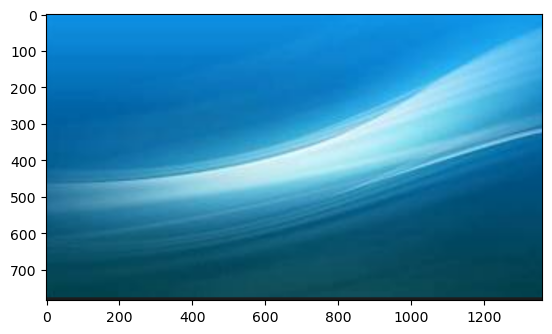

array([[[0.00027682, 0.00227605, 0.00356786, 0.00392157],
        [0.00027682, 0.00227605, 0.00356786, 0.00392157],
        [0.00027682, 0.00227605, 0.00356786, 0.00392157],
        ...,
        [0.00033833, 0.00244521, 0.00364475, 0.00392157],
        [0.00033833, 0.00244521, 0.00364475, 0.00392157],
        [0.00033833, 0.00244521, 0.00366013, 0.00392157]],

       [[0.00027682, 0.00227605, 0.00356786, 0.00392157],
        [0.00027682, 0.00227605, 0.00356786, 0.00392157],
        [0.00027682, 0.00227605, 0.00356786, 0.00392157],
        ...,
        [0.00033833, 0.00244521, 0.00364475, 0.00392157],
        [0.00033833, 0.00244521, 0.00364475, 0.00392157],
        [0.00033833, 0.00244521, 0.00366013, 0.00392157]],

       [[0.00026144, 0.00226067, 0.00355248, 0.00392157],
        [0.00026144, 0.00226067, 0.00355248, 0.00392157],
        [0.00026144, 0.00226067, 0.00355248, 0.00392157],
        ...,
        [0.00032295, 0.00242983, 0.00362937, 0.00392157],
        [0.00032295, 0.002429

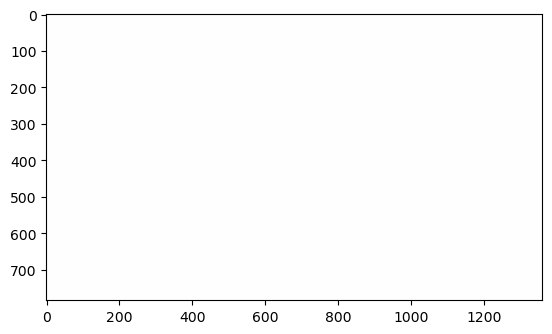